In [20]:
import numpy as np
from pathlib import Path
import sys
from PIL import Image
import os
import cv2
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import h5py

import torchvision.transforms as transforms

In [21]:
# Constructs a path to a directory that contains dataloader.py and plotCreator.py
module_path = str(Path.cwd().parents[0] / "methods")

# Checks to see if the directory is already in sys.path to avoid adding it multiple times.
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports all the functions defined in the dataloader.py
from dataloader import *

# Creates two file paths pointing to two HDF5 files
data_path0 = str(Path.cwd().parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
data_path1 = str(Path.cwd().parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")

# Reads the two HDF5 data files and creates two NumPy arrays
bhArray = dataToArray(data_path0)
sphArray = dataToArray(data_path1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


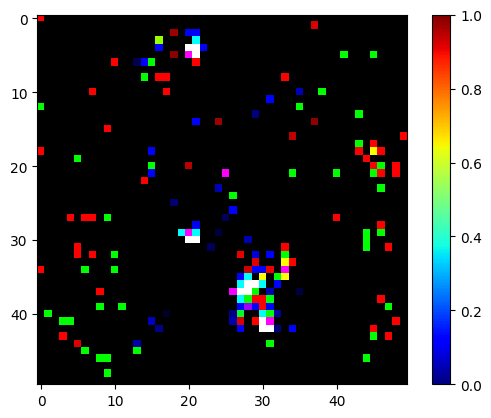

In [30]:
# Plot a 2D histogram from the first image in bhArray
plt.imshow(bhArray[0], cmap='jet')
plt.colorbar()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


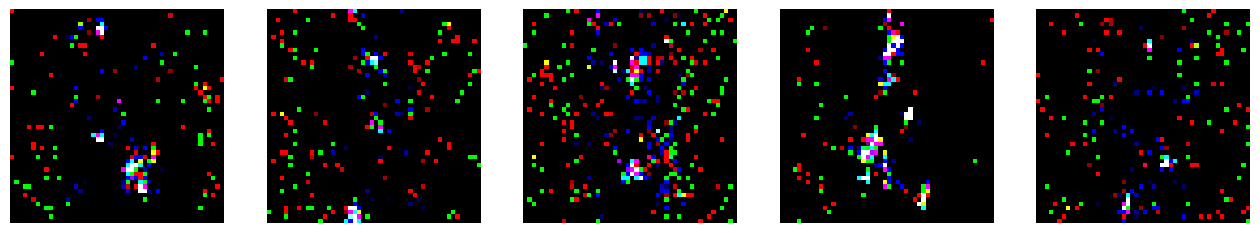

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


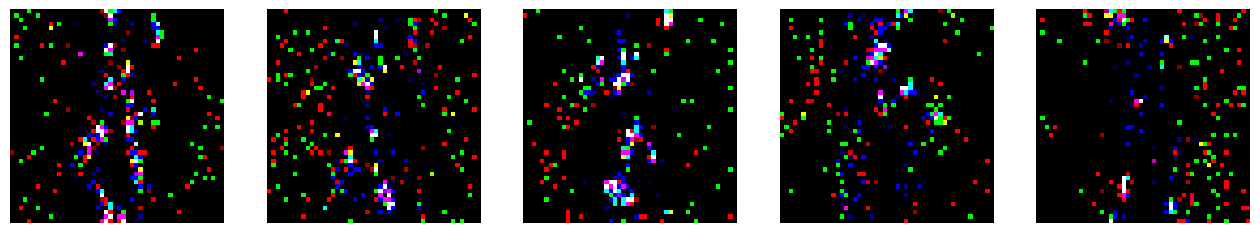

In [31]:
import matplotlib.pyplot as plt

def visualize_images(image_array, cmap='jet'):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 6))
    for i in range(5):
        ax = axes[i]
        ax.imshow(image_array[i], cmap=cmap, vmin=0, vmax=255)
        ax.axis('off')
    plt.show()

# Randomly sample 5 images from each array
# Select the first 5 images from each array
bh_sample = bhArray[:5]
sph_sample = sphArray[:5]


# Visualize the black hole images
visualize_images(bh_sample)

# Visualize the sphaleron images
visualize_images(sph_sample)

In [23]:
print("Black Hole Array has non-zero values:", np.count_nonzero(bhArray))
print("Sphaleron Array has non-zero values:", np.count_nonzero(sphArray))


Black Hole Array has non-zero values: 4292876
Sphaleron Array has non-zero values: 5102456


In [24]:
print("Black Hole Array Shape:", bhArray.shape)
print("Black Hole Array Data Type:", bhArray.dtype)
print("Black Hole Array Max Value:", bhArray.max())
print("Black Hole Array Min Value:", bhArray.min())

print("Sphaleron Array Shape:", sphArray.shape)
print("Sphaleron Array Data Type:", sphArray.dtype)
print("Sphaleron Array Max Value:", sphArray.max())
print("Sphaleron Array Min Value:", sphArray.min())


Black Hole Array Shape: (15000, 50, 50, 3)
Black Hole Array Data Type: float32
Black Hole Array Max Value: 31567.727
Black Hole Array Min Value: 0.0
Sphaleron Array Shape: (15000, 50, 50, 3)
Sphaleron Array Data Type: float32
Sphaleron Array Max Value: 16121.367
Sphaleron Array Min Value: 0.0


In [25]:
def normalize_and_map_to_color(image_array, cmap=plt.cm.plasma):
    # Normalize the values in the array between 0 and 1
    norm_array = (image_array - image_array.min()) / (image_array.max() - image_array.min())
    
    # Apply color map and convert the values to 8-bit integers (0-255)
    mapped_array = (cmap(norm_array)[:, :, :3] * 255).astype(np.uint8)
    
    return mapped_array

def save_images(bh_images, sph_images, output_folder='output'):
    # Create output directories if they don't exist
    bh_output_folder = os.path.join(output_folder, 'black_holes')
    sph_output_folder = os.path.join(output_folder, 'sphalerons')
    os.makedirs(bh_output_folder, exist_ok=True)
    os.makedirs(sph_output_folder, exist_ok=True)

    # Save black hole images
    for i, image in enumerate(bh_images):
        # Scale the pixel values to the range of 0-255 and convert to 8-bit integer
        scaled_image = (image * 255).astype(np.uint8)
        # Convert the image to the BGR color format (which is the default color format used by OpenCV)
        bgr_image = cv2.cvtColor(scaled_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(bh_output_folder, f"bh_{i}.png"), bgr_image)

    # Save sphaleron images
    for i, image in enumerate(sph_images):
        # Scale the pixel values to the range of 0-255 and convert to 8-bit integer
        scaled_image = (image * 255).astype(np.uint8)
        # Convert the image to the BGR color format (which is the default color format used by OpenCV)
        bgr_image = cv2.cvtColor(scaled_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(sph_output_folder, f"sph_{i}.png"), bgr_image)

In [26]:
def get_sample_images(bhArray, sphArray, num_images):
    bh_sample = bhArray[:num_images]
    sph_sample = sphArray[:num_images]

    return bh_sample, sph_sample

# Get the sample images
num_images = 100
bh_sample_images, sph_sample_images = get_sample_images(bhArray, sphArray, num_images)

# Save the preprocessed images
save_images(bh_sample_images, sph_sample_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


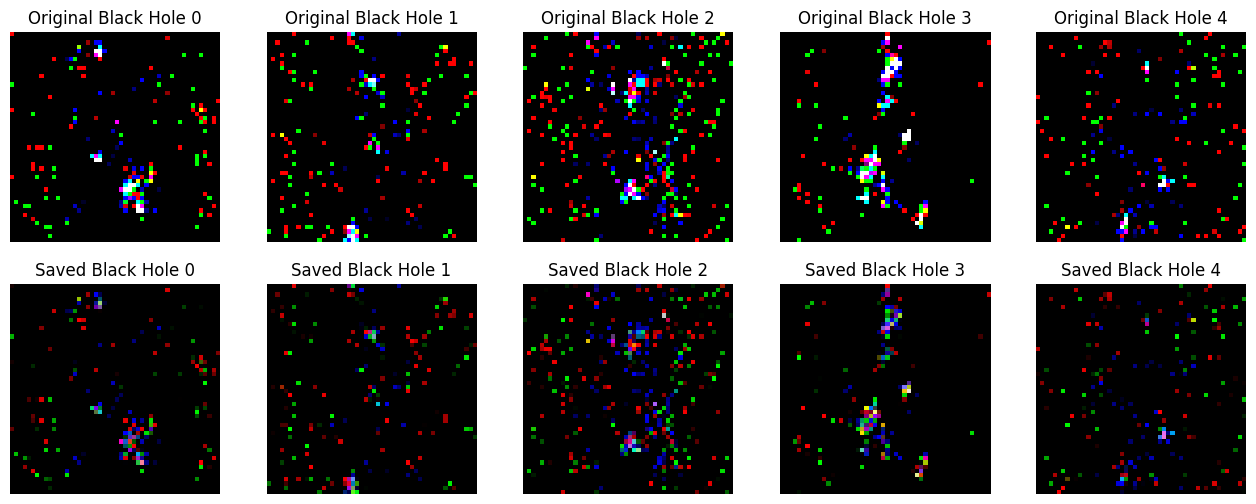

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


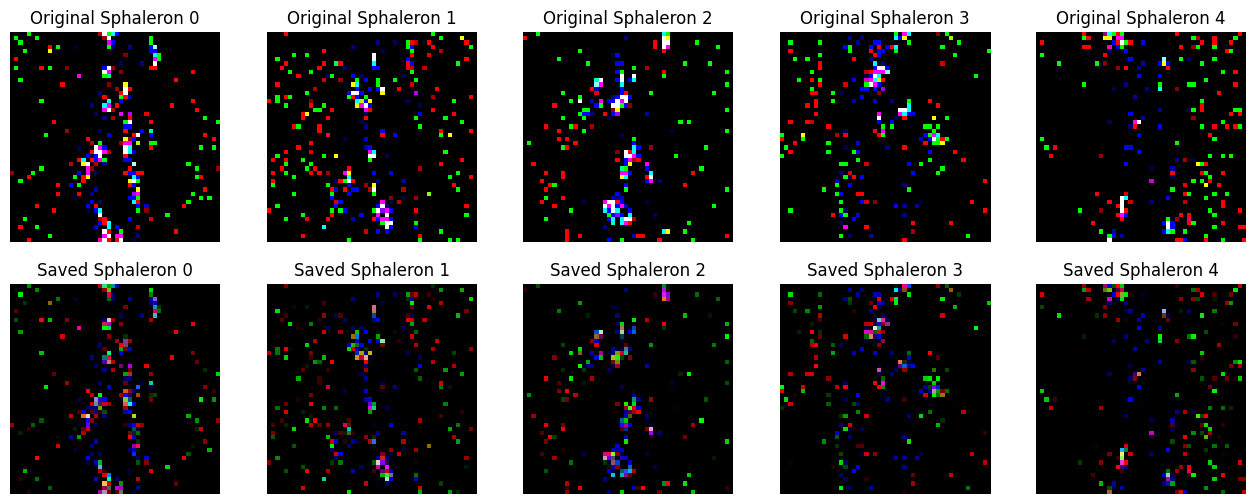

Black Hole Image 0 identical: False
Sphaleron Image 0 identical: False
Black Hole Image 1 identical: False
Sphaleron Image 1 identical: False
Black Hole Image 2 identical: False
Sphaleron Image 2 identical: False
Black Hole Image 3 identical: False
Sphaleron Image 3 identical: False
Black Hole Image 4 identical: False
Sphaleron Image 4 identical: False


In [27]:
def load_saved_images(num_images, output_folder='output'):
    bh_images = []
    sph_images = []
    bh_output_folder = os.path.join(output_folder, 'black_holes')
    sph_output_folder = os.path.join(output_folder, 'sphalerons')
    
    for i in range(num_images):
        bh_image = cv2.imread(os.path.join(bh_output_folder, f"bh_{i}.png"), cv2.IMREAD_COLOR)
        sph_image = cv2.imread(os.path.join(sph_output_folder, f"sph_{i}.png"), cv2.IMREAD_COLOR)
        bh_images.append(bh_image)
        sph_images.append(sph_image)
    
    return np.array(bh_images), np.array(sph_images)

def compare_images(original_images, saved_images, title, cmap='gray'):
    assert original_images.shape[0] == saved_images.shape[0], "Number of original and saved images should be equal."
    
    fig, axes = plt.subplots(nrows=2, ncols=original_images.shape[0], figsize=(16, 6))
    
    for i in range(original_images.shape[0]):
        ax = axes[0, i]
        ax.imshow(original_images[i], cmap=cmap, vmin=0, vmax=255)
        ax.axis('off')
        ax.set_title(f'Original {title} {i}')
        
        ax = axes[1, i]
        ax.imshow(cv2.cvtColor(saved_images[i], cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(f'Saved {title} {i}')
    
    plt.show()

def are_images_identical(image1, image2):
    return np.array_equal(image1, image2)

# Load only the first 5 saved images
num_images_to_compare = 5
bh_saved_images, sph_saved_images = load_saved_images(num_images_to_compare)

# Compare the original and saved black hole images
compare_images(bh_sample_images[:num_images_to_compare], bh_saved_images, 'Black Hole')

# Compare the original and saved sphaleron images
compare_images(sph_sample_images[:num_images_to_compare], sph_saved_images, 'Sphaleron')

# Check if the images are identical
for i in range(num_images_to_compare):
    print(f"Black Hole Image {i} identical:", are_images_identical(bh_sample_images[i], bh_saved_images[i]))
    print(f"Sphaleron Image {i} identical:", are_images_identical(sph_sample_images[i], sph_saved_images[i]))
